### Baseline Logistic Regression Modeling for The Vehicle Insurance Claim Fraud Detection System

Author: Hannah Lal
<br>Date: December 2023
<br>Email: itshannahlal@gmail.com


#### Introduction

Insurance fraud is a prevalent and costly challenge for both policyholders and insurance companies. Fraudulent activities may encompass "false claims," "misrepresentation of information," or "organized fraud schemes." Detecting and preventing these activities is crucial for minimizing financial losses for issuers as well as safeguarding policyholders. Given its significant impact, insurance fraud detection has emerged as a prominent  research area in data science and machine learning. This capstone project aims to concentrate on identifying and preventing fraudulent or misleading insurance claims using the dataset available at Kaggle. The objective is to develop algorithms and models that can automatically detect suspicious activities through historical data analysis. 


Vehicle Insurance Fraud Detection is a vital component within the realm of insurance fraud prevention. This critical undertaking is centered on the identification and prevention of unauthorized or fraudulent claims related to vehicle insurance, representing a significant financial concern for all stakeholders involved. The challenge at hand is to devise methods that are both efficient and accurate in detecting these deceptive activities. Our focus in this capstone project is to address this challenge head-on, utilizing historical data accessible on the Kaggle platform. By immersing ourselves in the nuances of vehicle insurance fraud, we aspire to develop innovative solutions that enhance the resilience of insurance systems against the evolving landscape of fraudulent activities in the automotive insurance domain.


Stakeholders involved with issues related to Vehicle Insurance Fraud Detection are policyholders, insurance companies, and financial institutions. Policyholders stand to gain heightened security and protection against fraudulent claims, fortifying their confidence in the insurance process. Concurrently, insurance companies and financial institutions reap the benefits of diminished financial losses resulting from fraudulent activities, thereby bolstering customer trust and elevating their standing and reputation within the industry. This collaborative effort aims to create a more secure and trustworthy landscape in the realm of vehicle insurance, benefitting all entities involved in the insurance ecosystem.

//TODO: Explain about my baseline modeling


For our baseline modeling we will be using the logistic regression model having the FraudFound_P column as our target variable to predict its values given all the other columns as its independent variables. 

For evaluation purposes, we will be using ... //TODO: complete this section


### Data Dictionary
The clean and preprocessed vehicle insurance fraud dataset (fraud_clean.csv) includes but is not limited to the following fields:

<!-- To be updated -->

| Features | Description |
|:------------|:------------|
| Make_1                  | Brand of the vehicle (initillay mapped as -> 'Pontiac', 'Toyota', 'Honda') |
| Make_2                  | Brand of the vehicle (initillay mapped as -> 'Chevrolet', 'Mazda') |
| Make_3                  | Brand of the vehicle (initillay mapped as -> 'VW', 'Ford', 'Accura') |
| AccidentArea            | where the accident happened (initillay mapped as -> 'Urban', 'Rural') |
| Sex                     | Gender of the vehicle owner (initillay mapped as -> Male/Female) |
| Married                 | Marital status of the vehicle owner is Married |
| Single                  | Marital status of the vehicle owner is Single |
| Age                     | Age of the vehicle owner |
| Fault                   | Fault of the accident: initillay mapped as -><br>Policy Holder: The fault of the accident is on Policy holder<br>Third Party: The fault of the accident is on the third party |
| PolicyType_1            | Indicates the type of coverage for the policy, specifying whether it covers 'Sedan - Collision', 'Sedan - Liability', 'Sedan - All Perils' |
| PolicyType_2            | Indicates the type of coverage for the policy, specifying whether it covers 'Sport - Collision', 'Utility - All Perils' |
| VehicleCategory_Sport   | Describes the category of the insured vehicle is Sport car |
| VehicleCategory_Sedan   | Describes the category of the insured vehicle is Sedan car |
| VehiclePrice            | The price range of the insured car |
| RepNumber               | Represents the identifier or code for the insurance representative or agent associated with the policy |
| Deductible              | Refers to the amount that the policyholder has to pay out of pocket before the insurance coverage takes effect |
| DriverRating            | Indicates the rating or risk associated with the driver insured under the policy (1 to 4) |
| Days_Policy_Accident    | The number of days since the last accident covered by the policy |
| Days_Policy_Claim       | The number of days since the last insurance claim was filed under the policy |
| PastNumberOfClaims      | Represents the total number of claims filed by the policyholder in the past |
| AgeOfVehicle            | Age of the vehicle involved in the accident |
| PoliceReportFiled       | Indicates whether a police report was filed in case of an accident or claim (Yes/No) |
| WitnessPresent          | Indicates whether any witnesses were present when the accident happened (Yes/No) |
| AgentType               | Describes the type or category of the insurance agent associated with the policy (External/Internal) |
| NumberOfSuppliments     | Indicates the number of additional supplements or endorsements to the policy |
| AddressChange_Claim     | Indicates whether there has been a change in the policyholder's address following a claim |
| NumberOfCars            | Indicates the number of cars involved in the accident |
| Year_1994               | The year the accident happened is (1994) |
| Year_1995               | The year the accident happened is (1995) |
| Base_Policy_Liability   | Describes the foundational or base insurance policy being 'Liability' |
| Base_Policy_Collision   | Describes the foundational or base insurance policy being 'Collision' |

| Target Variable | Description |
|:------------|:------------|
| FraudFound_P   | Probability of a fraud being found |

### Table of contents
* Section 1: Clean Data Representation
* Section 2: Logistic Regression
* Section 3: Decision Tree
* Section 4: Conclusion and Insights

### Section 1: Clean Data Representation

In [95]:
# importing required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import statsmodels.api as sm

from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV

%matplotlib inline

# filter warnings
import warnings
warnings.filterwarnings('ignore')

In [96]:
# read vehicle insurance fraud data:
df=pd.read_csv('C:/Users/itsha/Downloads/archive/fraud_clean.csv')

In [97]:
# display leading 5 rows of data:
df.head()

,AccidentArea,Sex,Age,Fault,FraudFound_P,RepNumber,Deductible,DriverRating,PoliceReportFiled,WitnessPresent,...,Make_2,Make_3,Married,Single,Year_1994,Year_1995,Number_Cars,Address_Change_Claim,DaysPolicy_Claim,DaysPolicy_Accident
0,1,0,21,0,0,12,300,1,0,0,...,0,0,0,0,1,0,2,2,3,3
1,1,1,34,0,0,15,400,4,1,0,...,0,0,0,0,1,0,0,0,3,3
2,1,1,47,0,0,7,400,3,0,0,...,0,0,0,1,1,0,0,0,3,3
3,0,1,65,1,0,4,400,2,1,0,...,0,0,0,1,1,0,0,0,3,3
4,1,0,27,1,0,3,400,1,0,0,...,0,0,0,0,1,0,0,0,3,3


In [98]:
# display last 5 rows of data:
df.tail()

,AccidentArea,Sex,Age,Fault,FraudFound_P,RepNumber,Deductible,DriverRating,PoliceReportFiled,WitnessPresent,...,Make_2,Make_3,Married,Single,Year_1994,Year_1995,Number_Cars,Address_Change_Claim,DaysPolicy_Claim,DaysPolicy_Accident
15414,1,1,35,0,1,5,400,4,0,0,...,0,0,0,1,0,0,0,0,3,3
15415,1,1,30,0,0,11,400,3,0,0,...,0,0,0,1,0,0,2,0,3,3
15416,0,1,24,0,1,4,400,4,0,0,...,0,0,0,0,0,0,0,0,3,3
15417,1,0,34,1,0,6,400,4,0,0,...,0,0,0,1,0,0,0,0,3,3
15418,1,1,21,0,1,3,400,4,0,0,...,0,0,0,0,0,0,0,0,3,3


In [99]:
# display a sample 10 rows of data:
df.sample(10)

,AccidentArea,Sex,Age,Fault,FraudFound_P,RepNumber,Deductible,DriverRating,PoliceReportFiled,WitnessPresent,...,Make_2,Make_3,Married,Single,Year_1994,Year_1995,Number_Cars,Address_Change_Claim,DaysPolicy_Claim,DaysPolicy_Accident
7159,1,1,33,0,0,6,400,1,0,0,...,0,0,0,0,0,1,0,0,3,3
7287,1,1,39,0,0,6,400,1,0,0,...,0,0,0,1,0,1,0,0,3,3
8793,1,0,39,1,0,8,400,2,0,0,...,0,0,0,1,0,1,0,0,3,3
5649,1,1,0,0,0,11,400,3,0,0,...,0,0,0,0,1,0,0,0,3,3
12826,0,0,69,1,0,11,400,2,0,0,...,1,0,0,1,0,0,0,0,3,3
3546,1,1,40,0,0,2,400,1,0,0,...,0,0,0,1,1,0,0,0,3,3
9791,1,1,0,0,0,9,400,2,0,0,...,0,0,0,0,0,1,0,3,3,3
965,1,1,60,1,0,7,400,1,0,0,...,0,0,0,1,1,0,0,0,3,3
6940,1,1,61,0,0,1,400,1,0,0,...,0,0,0,1,0,1,0,0,3,3
4188,1,1,33,1,0,10,400,1,0,0,...,1,0,0,0,1,0,0,0,3,3


Let's see how many rows and columns there are in the data set: 

In [100]:
df.shape

(15419, 32)

Let's see a summary of the data: 

In [101]:
# display summary of data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15419 entries, 0 to 15418
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   AccidentArea            15419 non-null  int64
 1   Sex                     15419 non-null  int64
 2   Age                     15419 non-null  int64
 3   Fault                   15419 non-null  int64
 4   FraudFound_P            15419 non-null  int64
 5   RepNumber               15419 non-null  int64
 6   Deductible              15419 non-null  int64
 7   DriverRating            15419 non-null  int64
 8   PoliceReportFiled       15419 non-null  int64
 9   WitnessPresent          15419 non-null  int64
 10  AgentType               15419 non-null  int64
 11  Vehicle_Price           15419 non-null  int64
 12  AgeVehicle              15419 non-null  int64
 13  Suppliments             15419 non-null  int64
 14  PastClaims              15419 non-null  int64
 15  Base_Policy_Liabili

First, we should separate the data from our target variable (labels) and create the X and y matrices:

In [102]:
X = df.drop(['FraudFound_P'], axis = 1) # separate FraudFound_P column from all others
y = df['FraudFound_P'] # is this a fraudulent claim?

print(X.head())
print(y.head())

   AccidentArea  Sex  Age  Fault  RepNumber  Deductible  DriverRating  \
0             1    0   21      0         12         300             1   
1             1    1   34      0         15         400             4   
2             1    1   47      0          7         400             3   
3             0    1   65      1          4         400             2   
4             1    0   27      1          3         400             1   

   PoliceReportFiled  WitnessPresent  AgentType  ...  Make_2  Make_3  Married  \
0                  0               0          0  ...       0       0        0   
1                  1               0          0  ...       0       0        0   
2                  0               0          0  ...       0       0        0   
3                  1               0          0  ...       0       0        0   
4                  0               0          0  ...       0       0        0   

   Single  Year_1994  Year_1995  Number_Cars  Address_Change_Claim  \
0   

##### Linear Regression: 

To be completed ...

In [103]:
# todo: implement this later
# import statsmodels.api as sm
# from statsmodels.api import tsa # time series analysis

# # adding a constant column to X
# X_constant_added = sm.add_constant(X)

# # 80%-20% train-test split
# X_train, X_test, y_train, y_test = train_test_split(X_constant_added, y, test_size=0.2, random_state=123)

In [104]:
# # fit linear reg model
# linear_reg = sm.OLS(y_train, X_train).fit()  
# print(linear_reg.summary())                   

In [105]:
# # multicollinearity check (Using VIF)
# vif = pd.DataFrame()
# vif["Variable"] = X_train.columns
# vif["VIF"] = [round(variance_inflation_factor(X_train.values, i),2) for i in range(X_train.shape[1])]
# print(vif)  # multicollinearity is high when we have a VIF greater than 10 

##### Logistic Regression:

We'll first split the data into train and test. We'll choose 80-20 proportions. Then, we will scale the data using the StandardScaler from the sklearn library. Then we will fit the logistic regression model on the scaled train and test data. Then, we will calculate the scores, percision and recall and we will also be displaying the confusion matrix as well as ROC AUC scores. 

In [106]:
# 80%-20% train-test split
# The stratify parameter in the train_test_split function is used to ensure that the distribution of the 
# target variable is similar in both the training and testing datasets. 
# This is particularly useful when dealing with imbalanced datasets, 
# where one class may be significantly underrepresented compared to the other.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# print(X_train.head())
# print(X_test.head())
# print(y_train.head())
# print(y_test.head())

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, precision_score, recall_score

# Standardize the features (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# logistic regression:
logreg = LogisticRegression(max_iter=1000, random_state=42) 
logreg.fit(X_train_scaled, y_train)

# Calculate accuracy using .score() on transformed data
accuracy_train = logreg.score(X_train_scaled, y_train)
accuracy_test = logreg.score(X_test_scaled, y_test)

print(f"Accuracy for train: {accuracy_train}")
print(f"Accuracy for test: {accuracy_test}")

Accuracy for train: 0.9401702472638832
Accuracy for test: 0.9400129701686122


As seen above we are overfitting the data. We also have highly imbalanced data which we ignored while modeling the data. In the next cell, we will be taking this imbalance into account and use the class_weight option in LogisticRegression model generation to take into account the imbalance of our dataset. This is particularly useful when dealing with imbalanced classification problems, such as fraud detection, where the number of positive (fraud) cases may be much smaller than the number of negative (non-fraud) cases.  

In [108]:
# Standardize the features (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# logistic regression:
logreg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced') # Use class_weight='balanced' for imbalanced datasets
logreg.fit(X_train_scaled, y_train)

# Calculate accuracy using .score() on transformed data
accuracy_train = logreg.score(X_train_scaled, y_train)
accuracy_test = logreg.score(X_test_scaled, y_test)

print(f"Accuracy for train: {accuracy_train}")
print(f"Accuracy for test: {accuracy_test}")

Accuracy for train: 0.6115119578435346
Accuracy for test: 0.6092736705577172


The accuracy drops considerably. Let's have a look at the predictions given the current model: 

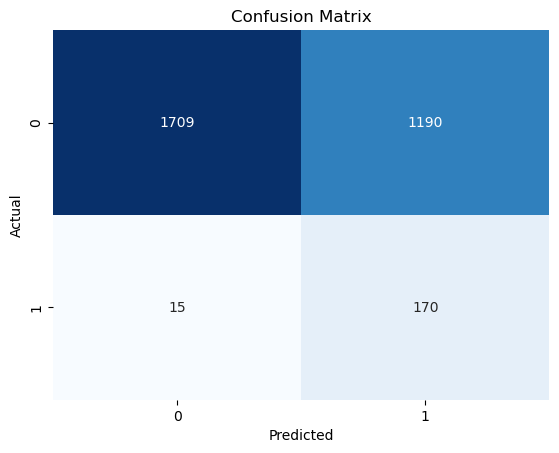

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.59      0.74      2899
           1       0.12      0.92      0.22       185

    accuracy                           0.61      3084
   macro avg       0.56      0.75      0.48      3084
weighted avg       0.94      0.61      0.71      3084

Precision: 0.125
Recall: 0.918918918918919


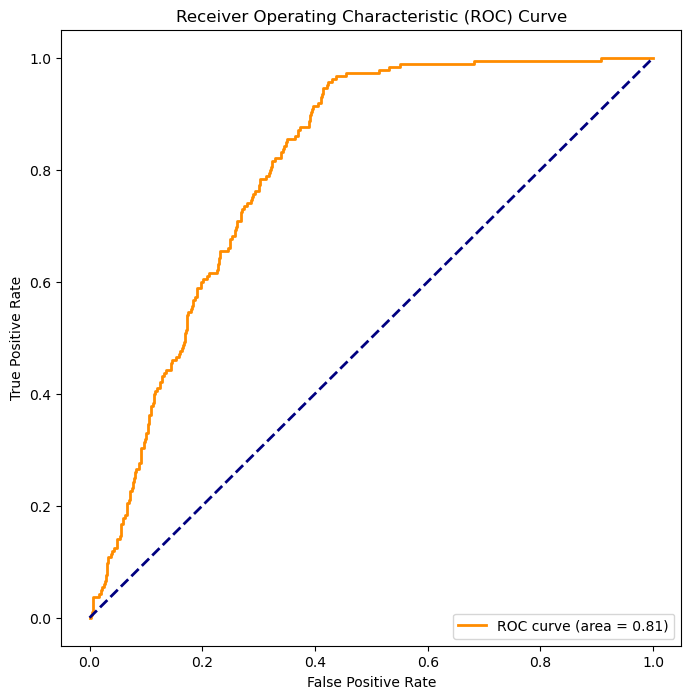

ROC AUC Score: 0.8059666427379432


In [109]:
# Predictions on the test set
y_pred = logreg.predict(X_test_scaled)
y_prob = logreg.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Precision and Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# ROC AUC Score
print("ROC AUC Score:", roc_auc)

Precision and recall are important metrics, especially in imbalanced datasets, to understand how well the model is performing in terms of correctly identifying positive cases (precision) and capturing all positive cases (recall).

##### Insights for Classification Report:

##### Class 0: 
* Percision: 0.99: Meaning When the model predicts class 0, it is correct 99% of the time
* Recall: 0.59: Meaning the model captures 59% of the actual instances of class 0
* F1-Score: 0.74

##### Class 1: 
* Percision: 0.12: Meaning when the model predicts class 1, it is correct only 12% of the time
* Recall: 0.92: Meaning the model is effective at capturing 92% of the actual instances of class 1
* F1-Score: 0.22

##### Overall: 
* Accuracy: 0.61: The overall accuracy of the model is 61%
* Macro avg (precision, recall, F1-score): 0.56, 0.75, 0.48
* Weighted avg (precision, recall, F1-score): 0.94, 0.61, 0.71

##### Precision and Recall: 
* Percision for class 1: When the model predicts fraud (class 1), it is correct only 12.5% of the time
* Recall for class 1: The model captures 91.9% of the actual instances of fraud

##### ROC AUC Score: 
* ROC AUC (Receiver Operating Characteristic Area Under the Curve) is a measure of the model's ability to distinguish between positive and negative classes. A score of 0.806 indicates relatively good performance. The closer the score is to 1, the better the model is at distinguishing between the two classes.
* What this means is that, The model shows a good ability to discriminate between the two classes as indicated by the ROC AUC score. 
* The precision for non-fraud (class 0) remains high, suggesting that when the model predicts non-fraud, it is usually correct. 
* The recall for fraud (class 1) is high, indicating that the model is effective at capturing innstances of fraud.
* The F1-score provides a balance between precision and recall.
* One recommendation to make the model better, is to adjust the model threshold and continue monitoring and fine-tuning the model based on our specific requirements for this application.
* We can also consider exploring other models or techniques to further improve performance, especifically due to the fact that not being able to detect fraudulent claims is a very costly miss on our side..94, 0.61, 0.71






#### Fine-Tuning the Logistic Regression Model: 

Le'ts make use of GridSearch functionality from the sklearn library. We will be defining 3 hyperparameters for our logistic regression model to tune in. 

In [110]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']
}

# Define the cross-validation strategy using the StratifiedKFold 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=cv, scoring='recall', n_jobs=-1)

# Fit the GridSearchCV instance on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


Now, let's use the best model found next: 

In [111]:
# Use the best model
best_model = grid_search.best_estimator_

# Evaluate the best model using cross-validated performance
cv_results = pd.DataFrame(grid_search.cv_results_)
print("Cross-validated ROC AUC scores:")
print(cv_results[['param_C', 'param_penalty', 'param_solver', 'mean_test_score']])

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

Cross-validated ROC AUC scores:
   param_C param_penalty param_solver  mean_test_score
0    0.001            l1    liblinear         0.871199
1    0.001            l1         saga         0.871199
2    0.001            l2    liblinear         0.907832
3    0.001            l2         saga         0.876669
4     0.01            l1    liblinear         0.910535
5     0.01            l1         saga         0.910535
6     0.01            l2    liblinear         0.895643
7     0.01            l2         saga         0.887516
8      0.1            l1    liblinear         0.890228
9      0.1            l1         saga         0.890228
10     0.1            l2    liblinear         0.883453
11     0.1            l2         saga         0.883453
12       1            l1    liblinear         0.883462
13       1            l1         saga         0.883462
14       1            l2    liblinear         0.883462
15       1            l2         saga         0.883462
16      10            l1    libli

##### Insights: 

##### Best Hyperparameters:
* C (Regularization Strength): 0.01: A smaller value of C indicates stronger regularization, which can help prevent overfitting.
* Penalty Type: 'l1' (Lasso): L1 regularization (Lasso) tends to result in sparse coefficient vectors, effectively performing feature selection by driving some coefficients to exactly zero.
* Solver Algorithm: 'liblinear': 'liblinear' is suitable for small to medium-sized datasets and is chosen as the optimization algorithm for logistic regression.

##### Classification Report: 
* Precision for Class 0 (non-fraud): 0.99: When the model predicts non-fraud, it is correct 99% of the time
* Precision for Class 1 (fraud): 0.13: When the model predicts fraud, it is correct 13% of the time.
* Recall for Class 0 (non-fraud): 0.58: The model captures 58% of the actual instances of non-fraud.
* Recall for Class 1 (fraud): 0.94: The model is effective at capturing 94% of the actual instances of fraud.
* F1-Score for Class 0: 0.74: The harmonic mean of precision and recall for non-fraud.
* F1-Score for Class 1: 0.22: The harmonic mean of precision and recall for fraud.
* Accuracy: 0.61: The overall accuracy of the model is 61%.

##### Interpretation: 
* The model has high precision for non-fraud, indicating that when it predicts non-fraud, it is usually correct.
* The recall for fraud is high, suggesting that the model is good at capturing instances of fraud.
* The choice of regularization parameters (C, penalty type) appears to have helped control overfitting.

One recommendation here is addressing class imbalance which is an important step in improving the performance of a model, especially in scenarios where one class is significantly underrepresented. Here are some techniques to use to address this imbalance: 

* Class Weights: In logistic regression, you can use the class_weight parameter to assign different weights to classes. This helps the model give more importance to the minority class
* Resampling Techniques: You can either oversample the minority class or undersample the majority class to balance the class distribution. The imbalanced-learn library provides implementations for these techniques
* Synthetic Data Generation: Techniques like SMOTE (Synthetic Minority Over-sampling Technique) can be used to generate synthetic examples for the minority class.

Next, we will be incorporating class weights into our logistic regression model:

In [112]:
# Calculate class weights
class_weights = {0: len(y_train) / (2 * (len(y_train) - sum(y_train))), 1: len(y_train) / (2 * sum(y_train))}

# Create a Logistic Regression model with class weights
model = LogisticRegression(C=0.01, penalty='l1', solver='liblinear', random_state=42, class_weight=class_weights)
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)

# Print the classification report and ROC AUC score
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])

print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.58      0.74      2899
           1       0.13      0.94      0.22       185

    accuracy                           0.61      3084
   macro avg       0.56      0.76      0.48      3084
weighted avg       0.94      0.61      0.70      3084

ROC AUC Score: 0.7983852773090441


As the results suggest,there is not much improvement in comparison to previous model. Let's try another technique.

Now, let's use the SMOTE method to address the imbalance of data: 

In [116]:
from imblearn.over_sampling import SMOTE

# Use 'SMOTE" on the training set (X_train_scaled and y_train) to oversample the minority class and balance the class distribution
# Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Create a Logistic Regression model
model = LogisticRegression(C=0.01, penalty='l1', solver='liblinear', random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Evaluate the model
y_pred = model.predict(X_test_scaled)

# Print the classification report and ROC AUC score
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])

print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.59      0.74      2899
           1       0.13      0.93      0.22       185

    accuracy                           0.61      3084
   macro avg       0.56      0.76      0.48      3084
weighted avg       0.94      0.61      0.71      3084

ROC AUC Score: 0.7998946514641583


Again, this method shows no improvement over the rest of them. There are a couple of things to do if both class weighting and SMOTE do not lead to significant improvements in the model, there are several other techniques and considerations we can explore to enhance the performance of the imbalanced fraud detection model.

* We can go back to the Feature Engineering step and make some modifications. Maybe deleting the columns related to month and date was a bad choice. this needs more investigation in the next sprint of this project. For this case, we will have to carefully analyze and engineer features that might provide more discriminatory power between classes. Then, iInvestigate interactions or transformations of features that might highlight patterns in the minority class
* We can use Ensemble Methods. Explore ensemble methods like Random Forest or Gradient Boosting, as they are robust and can handle imbalanced datasets well. 
Ensemble methods can combine multiple weak learners to create a strong classifier
* Anomaly Detection Techniques. We can c
Consider using anomaly detection techniques like Isolation Forest or One-Class SVM, which are designed to identify rare instances in a datase
* We can also use different algorithms for our baseline modeling. We can e
Experiment with different classification algorithms beyond logistic regression, such as Support Vector Machines (SVM), Decision Trees, or Neural Network

* Next, let's use the ensemble methods.s.t...

In [119]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
y_prob = rf_model.predict_proba(X_test_scaled)[:, 1]

# Print the classification report and ROC AUC score
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.50      0.02      0.04       185

    accuracy                           0.94      3084
   macro avg       0.72      0.51      0.51      3084
weighted avg       0.91      0.94      0.91      3084

ROC AUC Score: 0.8019978930292833


We see great improvement in our percision for class 1, yet we see a tremendous decrease in the value of recall, which is not desirable. 

Since none of the above fine-tunings worked on the logistic repgression model, we will be trying to train a decision tree model on our dataset.  

### Section 3: Decision Tree

Let's train the Decision Tree model on the scaled data. 

In [121]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = dt_model.predict(X_test_scaled)
y_prob = dt_model.predict_proba(X_test_scaled)[:, 1]

# Print the classification report and ROC AUC score
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2899
           1       0.16      0.14      0.15       185

    accuracy                           0.90      3084
   macro avg       0.55      0.55      0.55      3084
weighted avg       0.90      0.90      0.90      3084

ROC AUC Score: 0.5462964862068


For class 1, we see that although percision has somewhat improved the recall is now substantially decreased. Also for  the ROC AUC score, we can see that we can no longer distinguish the two classes as well as we used to with the logreg model.

To improve the decision tree, we can do the following: 
* Prune the Tree: Limit the depth of the tree or set a minimum number of samples required to split a node to prevent overfitting. 

In [123]:
# Set max_depth or min_samples_split
dt_model_pruned = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=5)
dt_model_pruned.fit(X_train_scaled, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [124]:
# Evaluate the model
y_pred = dt_model.predict(X_test_scaled)
y_prob = dt_model.predict_proba(X_test_scaled)[:, 1]

# Print the classification report and ROC AUC score
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2899
           1       0.16      0.14      0.15       185

    accuracy                           0.90      3084
   macro avg       0.55      0.55      0.55      3084
weighted avg       0.90      0.90      0.90      3084

ROC AUC Score: 0.5462964862068


* Tune Other Hyperparameters: Experiment with other hyperparameters like min_samples_leaf:

In [127]:
# Example with min_samples_leaf
dt_model_tuned = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=5, min_samples_leaf=5)
dt_model_tuned.fit(X_train_scaled, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=5,
                       random_state=42)

In [128]:
# Evaluate the model
y_pred = dt_model.predict(X_test_scaled)
y_prob = dt_model.predict_proba(X_test_scaled)[:, 1]

# Print the classification report and ROC AUC score
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2899
           1       0.16      0.14      0.15       185

    accuracy                           0.90      3084
   macro avg       0.55      0.55      0.55      3084
weighted avg       0.90      0.90      0.90      3084

ROC AUC Score: 0.5462964862068


* Use Ensemble methods: Consider using ensemble methods like Random Forest or Gradient Boosting

In [129]:
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

* Use cross-validation: 

In [132]:
from sklearn.model_selection import cross_val_score

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Perform cross-validation with ROC AUC as the scoring metric
cv_scores = cross_val_score(dt_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')

# Print the cross-validated ROC AUC scores
print("Cross-validated ROC AUC scores:", cv_scores)
print("Mean ROC AUC:", cv_scores.mean())

# Define the parameter grid for grid search
param_grid = {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42, class_weight='balanced'), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best model from grid search
best_dt_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_dt_model.predict(X_test_scaled)
y_prob = best_dt_model.predict_proba(X_test_scaled)[:, 1]

# Print the classification report and ROC AUC score on the test set
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Classification Report:\n", class_report)
print("ROC AUC Score on Test Set:", roc_auc)

Cross-validated ROC AUC scores: [0.57806545 0.55966429 0.56067096 0.57596323 0.55129164]
Mean ROC AUC: 0.5651311128819111
Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 5}
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.59      0.74      2899
           1       0.13      0.93      0.22       185

    accuracy                           0.61      3084
   macro avg       0.56      0.76      0.48      3084
weighted avg       0.94      0.61      0.71      3084

ROC AUC Score on Test Set: 0.8006022580013612


##### Insights: 

* The best hyperparameters found through grid search are {'max_depth': 5, 'min_samples_split': 5}
* The mean ROC AUC across the folds is approximately 0.565.
* The cross-validated ROC AUC scores for the 5 folds are as follows: [0.578, 0.560, 0.561, 0.576, 0.551]
* The ROC AUC scores indicate the model's ability to discriminate between positive and negative classes. A value close to 0.5 suggests poor discrimination, here, higher values are desirable.
* Classification Report on Test Set: The model has high precision for the negative class (non-fraud), indicating that when it predicts non-fraud, it is usually correct (percision). The model has high recall for the positive class (fraud), capturing a significant portion of actual fraud cases (Recall). The ROC AUC score on the test set is approximately 0.801. The model shows reasonable performance, especially in capturing fraud cases (positive class) 

The best model train using a decision tree is very much similar to the best model trained using the log reg method. For the next steps, we will be going back to our feature engineering step to see if we can train a better model by making some revised decisions about the preprocessing anf feature wngineering steps. (Next Sprint)

### Section 4: Conclusion and Insights

We fit two best logreg and dt models that somewhat behave the same is terms on ROC AUC and Percision and Recall measures. For the next steps, we will be rethinking the feature engineering step, with a focus on including accident and insurrance claim date info. We will also be checking which predictors have undesireable p_values and what is the effect of training a logreg and a dt model in absence of those low contributors.

### Section 2: Logistic Regression